In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.linalg import norm
import cv2

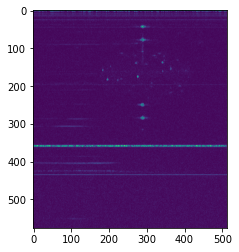

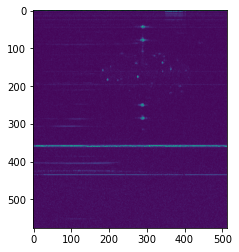

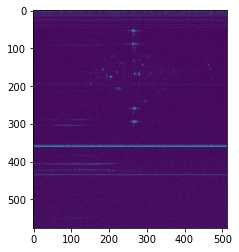

In [2]:
# Importation des images
data1_0deg = loadmat('0_v1.mat')
data1_0deg = data1_0deg['image']
plt.imshow(data1_0deg)
plt.show()

data2_0deg = loadmat('0_v2.mat')
data2_0deg = data2_0deg['image']
plt.imshow(data2_0deg)
plt.show()

data_360deg = loadmat('360_v1.mat')
data_360deg = data_360deg['image']
plt.imshow(data_360deg)
plt.show()

In [3]:
def compare_images(img1, img2):
    diff = cv2.subtract(img1, img2)   
    z_norm = norm(diff.ravel(), 0)
    variance = ndimage.variance(diff)
    moyenne = ndimage.mean(diff)
    return (z_norm, variance, moyenne)

def ratios(data1_0deg, data2_0deg, data_360deg):
    n_0ref, varianceRef, moyenneRef = compare_images(data1_0deg, data2_0deg)
    print("Images de référence =>")
    print("La norme zéro est de :", n_0ref, "/ par pixel:", n_0ref*1.0/data1_0deg.size)
    print("La variance de la différence des images est de :", varianceRef)
    print("La moyenne de la différence des images est de :", moyenneRef)
    
    print("Image évaluée =>")
    n_0diff, varianceDiff, moyenneDiff = compare_images(data1_0deg, data_360deg)
    print("La norme zéro est de :", n_0diff, "/ par pixel:", n_0diff*1.0/data1_0deg.size)
    print("La variance de la différence des images est de :", varianceDiff)
    print("La moyenne de la différence des images est de :", moyenneDiff)
    
    ratio_n0 = n_0diff/n_0ref
    ratio_variance = varianceDiff/varianceRef
    ratio_moyenne = moyenneDiff/moyenneRef
    return (ratio_n0, ratio_variance, ratio_moyenne)

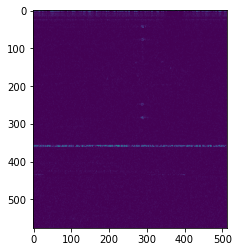

In [4]:
ref = cv2.subtract(data1_0deg, data2_0deg)
plt.imshow(ref)
plt.show()

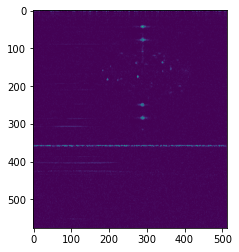

In [5]:
diff = cv2.subtract(data1_0deg, data_360deg)
plt.imshow(diff)
plt.show()

In [6]:
ratio_n0, ratiovariance, ratiomoyenne = ratios(data1_0deg, data2_0deg, data_360deg)

print("Résultats du test =>")
if ratiovariance < 1.2 and ratio_n0 < 1.2 and ratiomoyenne < 1.2:
    print ("RÉUSSITE du test.")

else :
    print("ÉCHEC du test.")

Images de référence =>
La norme zéro est de : 149375.0 / par pixel: 0.5065070258246528
La variance de la différence des images est de : 6861226.96949904
La moyenne de la différence des images est de : 810.2872450086805
Image évaluée =>
La norme zéro est de : 144088.0 / par pixel: 0.4885796440972222
La variance de la différence des images est de : 7635312.256742279
La moyenne de la différence des images est de : 815.012437608507
Résultats du test =>
RÉUSSITE du test.
